In [14]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set display settings

pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

In [3]:
# specify columns, datatypes, and load full consolidated sdss dataset

# load column names from file into a list
sdss_headers = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, index_col=0, nrows=0).columns.tolist()

# specify groups of columns
object_identifiers = ['dr7objid', 'dr8objid', 'specobjid', 'gz2_filenumber']
object_locations = ['ra', 'dec']
object_class_labels = ['sdss_clean_class_name', 'sdss_clean_subclass_name', 'gz2_subclass_name', 'elodie_spectral_type']
object_binary_labels = ['gz1_flag_spiral', 'gz1_flag_elliptical', 'gz1_flag_uncertain'] \
    + [label for label in sdss_headers if 'flag' in label]
object_filters = ['score', 'petroR90_r']
object_features = ['redshift_final', 'redshift_noqso', 'redshift_elodie',
                   'u_s', 'g_s', 'r_s', 'i_s', 'z_s',
                   'u_p', 'g_p', 'r_p', 'i_p', 'z_p',
                   'elodie_color_index', 'elodie_temperature', 'elodie_metallicity']

# create a datatype dictionary for object_identifiers
object_dtypes = {col: 'string' for col in object_identifiers}

# load full consolidated sdss dataset
sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)

/tmp/ipykernel_371/279226147.py:22: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  sdss_full = pd.read_csv('../data/processed/sdss_full.csv.gz', compression='gzip', header=0, dtype=object_dtypes)


In [4]:
# inspect the imported data
 
 # display some data
display(sdss_full.head(3))
display(sdss_full.tail(3))
display(sdss_full.sample(10))
 
# inspect dataframe
print(sdss_full.shape)
print(sdss_full.info())
for identifier in object_identifiers:
    print(f"\nTop Value Counts:  {sdss_full[identifier].value_counts().nlargest(5)}")

,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
0,588007006336254064,1237651252584448100,693716010653476864,192933,236.355530,54.820911,galaxy,STARFORMING,SBc2l,unclassified,True,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0.850861,10.064850,0.080127,0.0,0.0,6.013997,19.66714,43.23034,61.21994,73.57887,18.91253,17.53665,16.81467,16.43992,16.18453,NaN,NaN,NaN
1,588007006336254083,1237651252584448112,693718759432546304,<NA>,236.342000,54.802830,galaxy,unclassified,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850861,6.995347,0.193371,0.0,0.0,4.234163,11.95987,31.28475,46.43085,56.40972,19.66911,18.16584,17.27259,16.84296,16.55850,NaN,NaN,NaN
2,587729226614112406,1237651252584251555,693718209676732416,32264,235.891464,55.133472,galaxy,AGN,SBc?t,unclassified,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.863360,10.959250,0.040399,0.0,0.0,18.203950,60.73151,129.97640,179.21480,215.18610,17.46699,15.83618,15.09113,14.70903,14.41906,NaN,NaN,NaN


,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
1654165,<NA>,1237658613593997533,9259471051523641344,<NA>,177.50007,50.211641,quasar,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807279,NaN,1.076416,0.231599,0.0,0.765539,1.052253,1.874948,1.917074,2.357079,21.84895,21.91097,21.59686,21.60826,21.09701,0.0,0.0,0.0
1654166,<NA>,1237658613594063054,9259459231773642752,<NA>,177.79391,50.208232,unclassified,unclassified,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819832,NaN,2.060357,-0.004214,0.0,7.819283,5.829438,6.240019,6.629135,8.703038,20.83662,20.68300,20.50494,20.39749,20.39611,0.0,0.0,0.0
1654167,<NA>,1237658613594063058,9259460331285270528,<NA>,177.79678,50.375821,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819832,NaN,1.856644,0.123349,0.0,0.191132,1.780057,1.906872,2.832188,3.034446,22.02470,21.56175,21.59132,21.17899,21.09313,0.0,0.0,0.0


,dr7objid,dr8objid,specobjid,gz2_filenumber,ra,dec,sdss_clean_class_name,sdss_clean_subclass_name,gz2_subclass_name,elodie_spectral_type,gz1_flag_spiral,gz1_flag_elliptical,gz1_flag_uncertain,gz2_flag_smooth,gz2_flag_features_or_disk,gz2_flag_star_or_artifact,gz2_flag_edgeon_yes,gz2_flag_edgeon_no,gz2_flag_bar_yes,gz2_flag_bar_no,gz2_flag_spiral_yes,gz2_flag_spiral_no,gz2_flag_bulge_none1,gz2_flag_bulge_small,gz2_flag_bulge_medium,gz2_flag_bulge_large,gz2_flag_odd_yes,gz2_flag_odd_no,gz2_flag_round_circular,gz2_flag_round_medium,gz2_flag_round_cigar,gz2_flag_feature_ring,gz2_flag_feature_lens_or_arc,gz2_flag_feature_disturbed,gz2_flag_feature_irregular,gz2_flag_feature_other,gz2_flag_feature_merger,gz2_flag_feature_dust_lane,gz2_flag_bulge_round,gz2_flag_bulge_boxy,gz2_flag_bulge_none2,gz2_flag_arms_tight,gz2_flag_arms_medium,gz2_flag_arms_loose,gz2_flag_arms_1,gz2_flag_arms_2,gz2_flag_arms_3,gz2_flag_arms_4,gz2_flag_arms_many,gz2_flag_arms_unsure,score,petroR90_r,redshift_final,redshift_noqso,redshift_elodie,u_s,g_s,r_s,i_s,z_s,u_p,g_p,r_p,i_p,z_p,elodie_color_index,elodie_temperature,elodie_metallicity
47572,588007005767860540,1237651252016054629,486564438346852352,<NA>,116.907000,40.130420,galaxy,STARFORMING,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854485,5.041833,0.097347,0.000000,0.0,7.371180,18.235940,37.007510,59.78032,75.78127,19.67094,18.10534,17.35745,16.93291,16.63924,NaN,NaN,NaN
507687,587742013813555335,1237667735038460021,2801414135059867648,163652,167.088120,21.413565,galaxy,unclassified,Ec,unclassified,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,0.888292,4.280978,0.078183,0.000000,0.0,11.131130,43.326490,102.236600,147.34020,185.95590,19.51984,17.66090,16.77121,16.36727,16.02495,NaN,NaN,NaN
1147807,<NA>,1237666185108324599,8738295954514661376,<NA>,353.876630,31.109044,quasar,BROADLINE,unclassified,unclassified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.938691,NaN,1.306339,0.414791,0.0,13.761630,10.561740,16.600960,17.66960,19.20623,20.19659,20.32275,19.82977,19.82003,19.82268,0.000,0.0,0.00
166765,587731891647873190,1237657771787419898,1021311926719768576,49189,163.214966,56.403904,galaxy,unclassified,Sb(r),unclassified,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0.890322,5.201260,0.075332,0.000000,0.0,13.505970,40.367940,96.390040,143.72750,188.45650,19.60236,17.63470,16.71468,16.27759,15.94906,NaN,NaN,NaN
5753,587729388211404984,1237654380900450464,859146878569179136,<NA>,129.523000,45.719310,galaxy,unclassified,unclassified,unclassified,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.814789,6.505565,0.144733,0.000000,0.0,3.748132,16.304520,48.509460,73.13473,99.21420,20.43709,18.33979,17.19519,16.73663,16.36428,NaN,NaN,NaN
10576,587725590385328415,1237656529994056042,403212659761113088,<NA>,263.737900,56.788860,unclassified,unclassified,unclassified,unclassified,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860084,5.091026,0.057891,0.000000,0.0,11.637090,27.716270,52.079220,76.06080,92.43719,19.50139,17.66855,17.06127,16.67248,16.38801,NaN,NaN,NaN
116505,587730772817281210,1237656494042185933,847868912891619328,<NA>,5.339042,13.900640,ga

(1654168, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654168 entries, 0 to 1654167
Data columns (total 68 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   dr7objid                      658334 non-null   string 
 1   dr8objid                      1654168 non-null  string 
 2   specobjid                     1654168 non-null  string 
 3   gz2_filenumber                236466 non-null   string 
 4   ra                            1654168 non-null  float64
 5   dec                           1654168 non-null  float64
 6   sdss_clean_class_name         1654168 non-null  object 
 7   sdss_clean_subclass_name      1654168 non-null  object 
 8   gz2_subclass_name             1654168 non-null  object 
 9   elodie_spectral_type          1654168 non-null  object 
 10  gz1_flag_spiral               658334 non-null   object 
 11  gz1_flag_elliptical           658334 non-null   object 
 12  gz1_flag_uncer


----------sdss_clean_class_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 4
	The % of the most common labels for column: sdss_clean_class_name
galaxy          34.326380
unclassified    28.910304
star            24.431013
quasar          12.332302
Name: count, dtype: float64

----------sdss_clean_subclass_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 171
	The % of the most common labels for column: sdss_clean_subclass_name
unclassified      54.664399
STARFORMING        9.275600
BROADLINE          8.997816
F9                 3.774949
F5                 3.246889
A0                 1.914497
F3/F5V (30743)     1.720744
STARBURST          1.514417
G2                 0.983999
K3                 0.927354
Name: count, dtype: float64

----------gz2_subclass_name----------
	The number of rows with empty values is: 0
	The number of unique labels is: 815
	The % of the most common labels for column: gz2_subcl

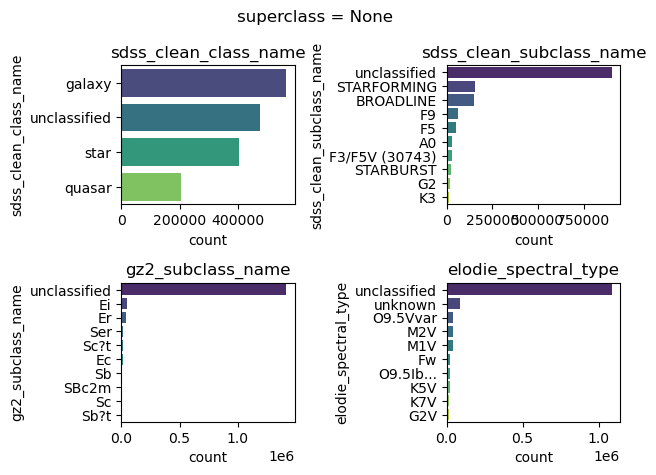

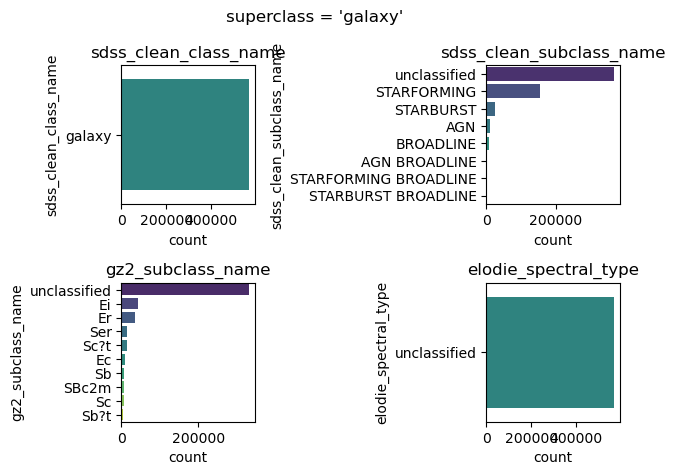

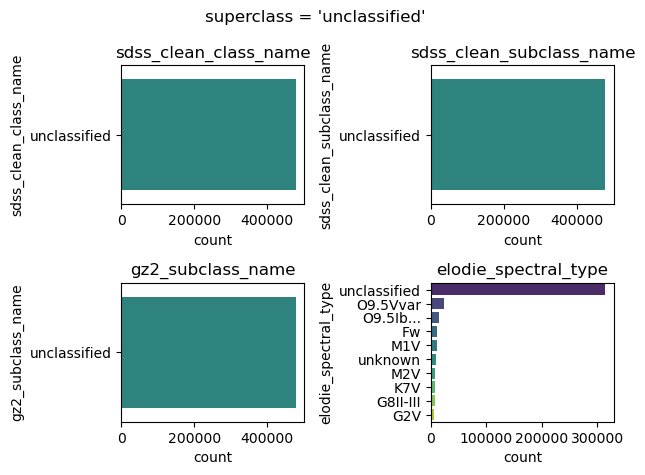

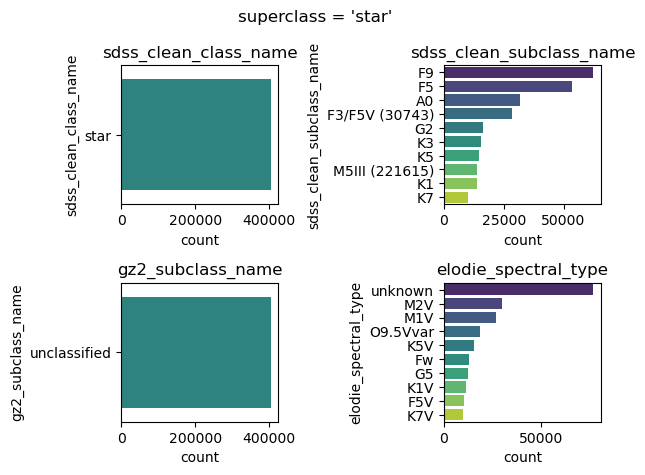

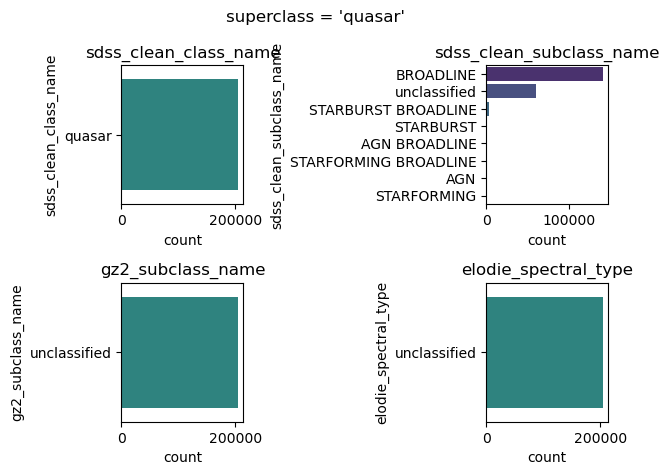

In [65]:
# investigate classes (categorical labels)

# create a helper function for investigating a column w/ categorical data
def investigate_classes(df, column):
    print(f"\n----------" + label + "----------")
    print(f"\tThe number of rows with empty values is: {df[column].isna().sum()}")
    print(f"\tThe number of unique labels is: {len(df[column].unique())}")
    print(f"\tThe % of the most common labels for column: {100 * df[column].value_counts().head(10) / len(df[column])}")

# summarize label counts for each categorical data column
for label in object_class_labels:
    investigate_classes(sdss_full, label)

# create a helper function to plot the value counts of the top-10 labels for each categorical class
# in a subset of data (based on the sdss_clean_class_name)
def plot_categorical_counts(superclass=None):
    df = sdss_full
    if superclass:
        df = sdss_full[sdss_full['sdss_clean_class_name'] == superclass]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for i, ax in enumerate(axes.flatten()):
        data = df[object_class_labels[i]]
        sns.countplot(y=data, ax=ax, order=data.value_counts().index[:10], palette='viridis')
        ax.set_title(f"{object_class_labels[i]}")
    plt.suptitle(f"{superclass = }")
    plt.tight_layout()
    plt.show()

# plot the value counts of the top-10 labels for all and each categorical class
for label in [None] + sdss_full['sdss_clean_class_name'].unique().tolist():
    plot_categorical_counts(label)

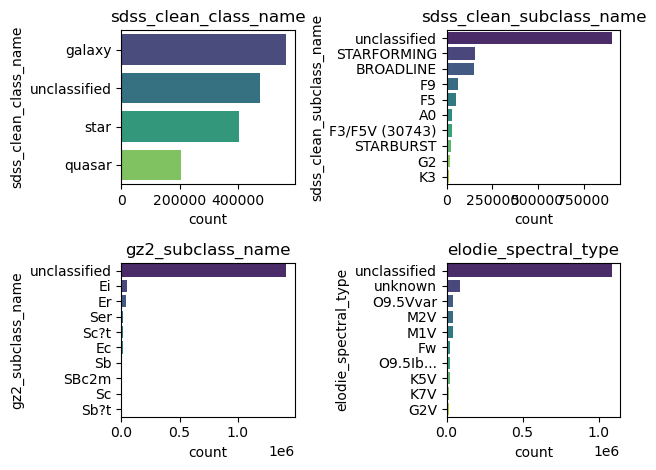

In [21]:
# create a helper function to plot the value counts of the top-10 labels for each categorical class in a given data subset
fig, axes = plt.subplots(nrows=2, ncols=2)
for i, ax in enumerate(axes.flatten()):
    data = sdss_full[object_class_labels[i]]
    sns.countplot(y=data, ax=ax, order=data.value_counts().index[:10], palette='viridis')
    ax.set_title(f"{object_class_labels[i]}")
plt.tight_layout()
plt.show()

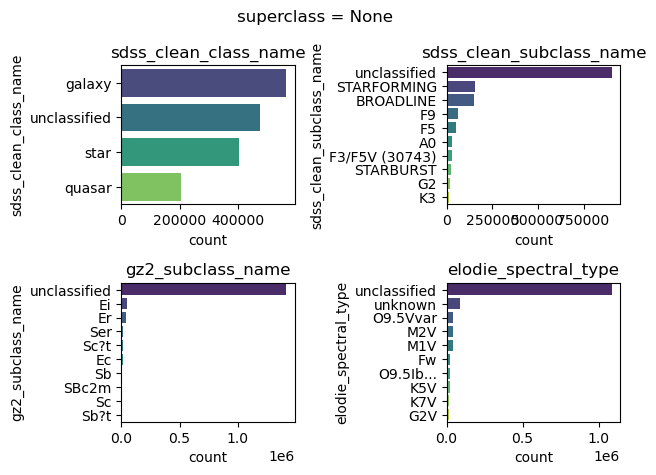

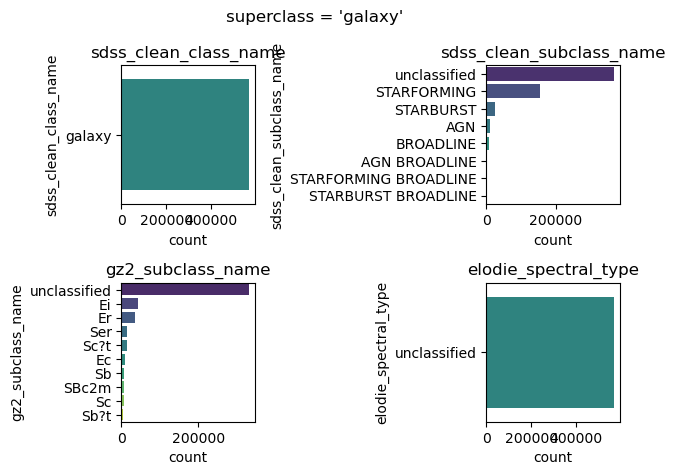

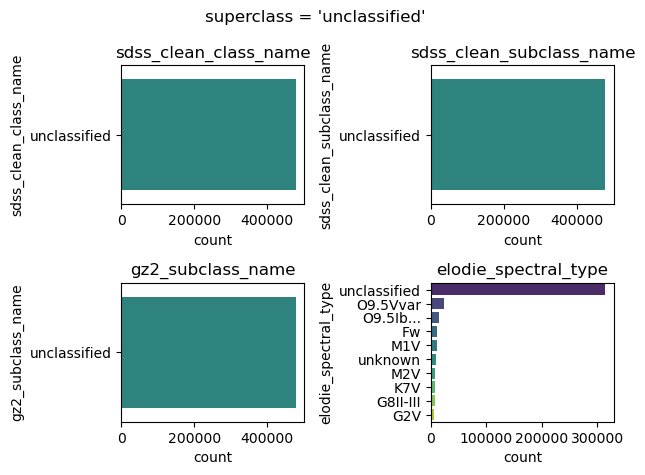

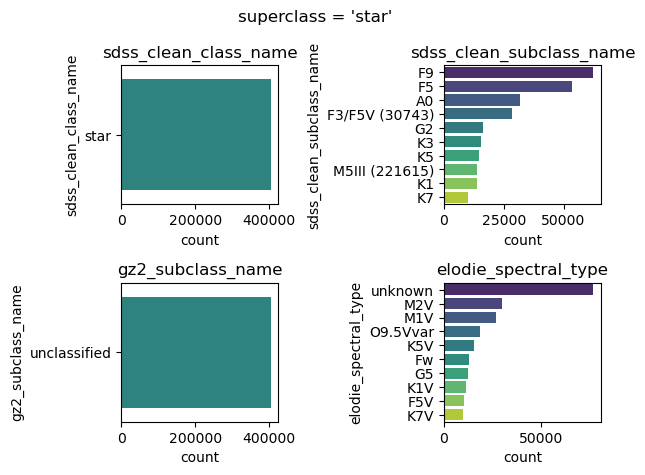

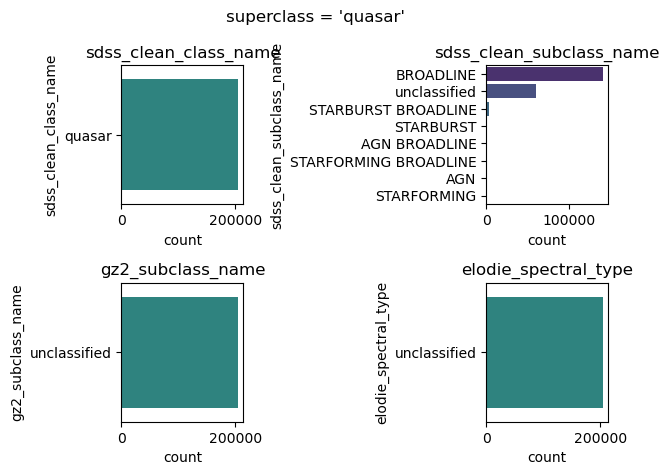

In [64]:
# create a helper function to plot the value counts of the top-10 labels for each categorical class
# in a subset of data (based on the sdss_clean_class_name)
def plot_categorical_counts(superclass=None):
    df = sdss_full
    if superclass:
        df = sdss_full[sdss_full['sdss_clean_class_name'] == superclass]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    for i, ax in enumerate(axes.flatten()):
        data = df[object_class_labels[i]]
        sns.countplot(y=data, ax=ax, order=data.value_counts().index[:10], palette='viridis')
        ax.set_title(f"{object_class_labels[i]}")
    plt.suptitle(f"{superclass = }")
    plt.tight_layout()
    plt.show()

# plot the value counts of the top-10 labels for all and each categorical class
for label in [None] + sdss_full['sdss_clean_class_name'].unique().tolist():
    plot_categorical_counts(label)